In [5]:
# Importing the necessary libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA   # Principal component analysis
#PCA = dimensionality reduction technique
#PCA --- is used to convert high dimensional_data(suppose 500 columns of data) into low dimensional_data( 5 or 10 or 20 columns)
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [11]:
# Loading the data!
df = pd.read_csv('D:\\5.1_Machine_Learning_Code\\Clustering\\CC GENERAL.csv')

In [13]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
# Dropping the CUST_ID column from the data
df = df.drop('CUST_ID', axis = 1)
# Handling the missing values
df = df.ffill(axis=1)

In [17]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,0.000000,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [19]:
df.shape

(8950, 17)

In [168]:
# Data Preprocessing!

# Scale the data
df_scaled = StandardScaler().fit_transform(df)

# Normalize the scaled data
df_normalized = normalize(df_scaled)

# Convert the numpy array back to a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)

In [170]:
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312161,-0.106373,-0.181201,-0.152217,-0.148867,-0.199063,-0.343933,-0.289419,-0.301638,-0.288006,-0.203023,-0.218061,-0.409489,-0.225586,-0.127411,-0.224124,0.153814
1,0.219914,0.037537,-0.131215,-0.099744,-0.127030,0.728127,-0.341416,-0.189649,-0.256251,0.160392,0.030760,-0.165375,0.192460,0.228767,0.026864,0.065454,0.100791
2,0.126691,0.146793,-0.030507,0.030852,-0.128799,-0.132258,0.359796,0.757492,-0.259820,-0.191353,-0.134889,-0.030890,0.234074,-0.108747,-0.026145,-0.148909,0.102195
3,0.020361,-0.421714,0.096231,0.226496,-0.188505,-0.152875,-0.420542,-0.165591,-0.380263,-0.107367,-0.136652,-0.228725,0.342583,-0.248266,-0.148385,-0.217938,0.149568
4,-0.151682,0.219035,-0.195350,-0.146828,-0.192185,-0.197347,-0.428750,-0.168824,-0.387686,-0.285523,-0.201272,-0.233190,-0.382720,-0.154047,-0.107469,-0.222192,0.152487


In [36]:
df_normalized.shape

(8950, 17)

In [86]:
# Dimensionality Reduction using PCA (2 components for visualization)
pca = PCA(n_components=2)
X_principal = pca.fit_transform(df_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

In [88]:
X_principal.head()

,P1,P2
0,-0.490660,-0.679192
1,-0.518530,0.545432
2,0.330852,0.269035
3,-0.475726,-0.111265
4,-0.564063,-0.480973


In [90]:
X_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      8950 non-null   float64
 1   P2      8950 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


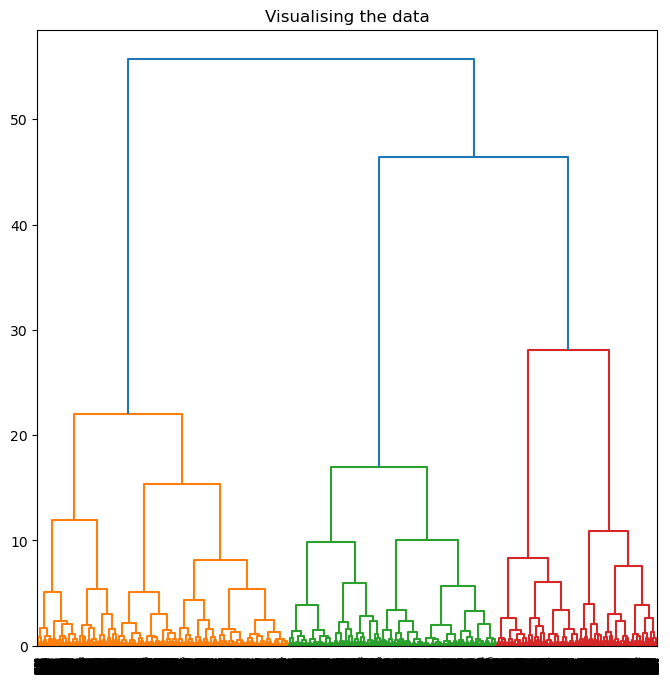

In [96]:
# Data Visualization!

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

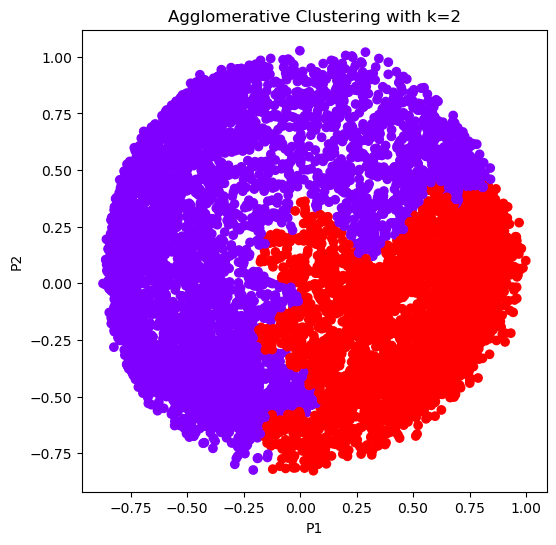

In [157]:
# Create the Agglomerative Clustering model with 2 clusters
ac2 = AgglomerativeClustering(n_clusters=2)

# Fit and predict clusters
clusters = ac2.fit_predict(X_principal)

# Visualize the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=clusters, cmap='rainbow')
plt.title('Agglomerative Clustering with k=2')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

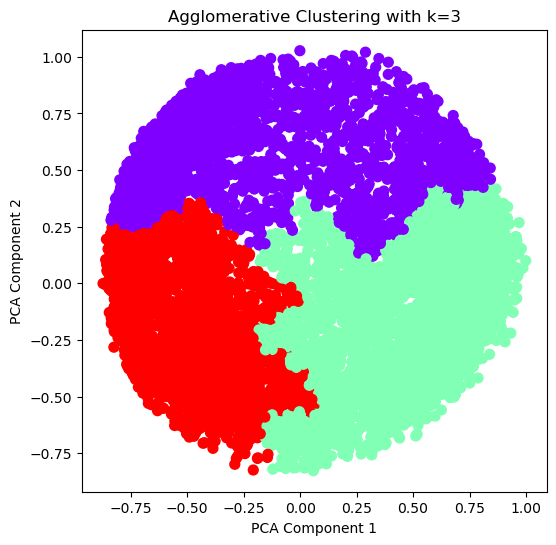

In [132]:
# Agglomerative Clustering with k=3
ac3 = AgglomerativeClustering(n_clusters=3)

# Visualizing the clusters
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c=ac3.fit_predict(X_principal), cmap='rainbow', s=50)
plt.title('Agglomerative Clustering with k=3')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

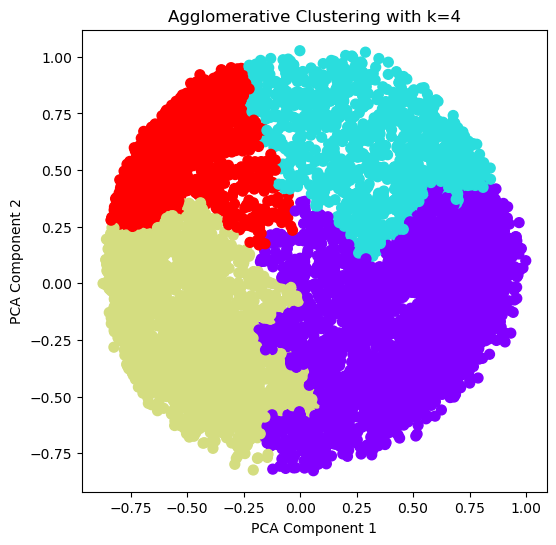

In [134]:
# Agglomerative Clustering with k=4
ac4 = AgglomerativeClustering(n_clusters=4)

# Visualizing the clusters
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c=ac4.fit_predict(X_principal), cmap='rainbow', s=50)
plt.title('Agglomerative Clustering with k=4')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

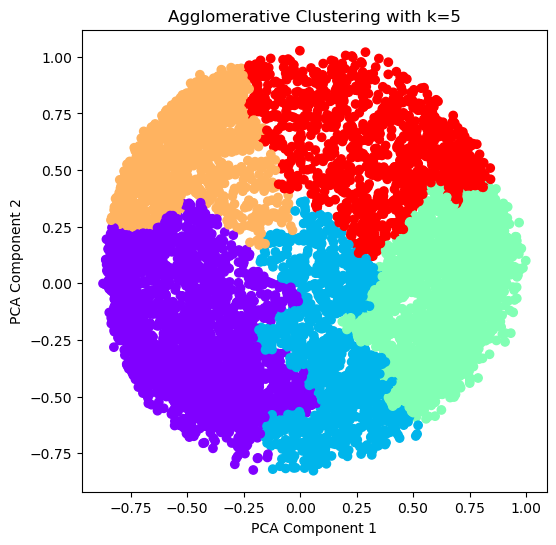

In [151]:
# k=5

ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.title('Agglomerative Clustering with k=5')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

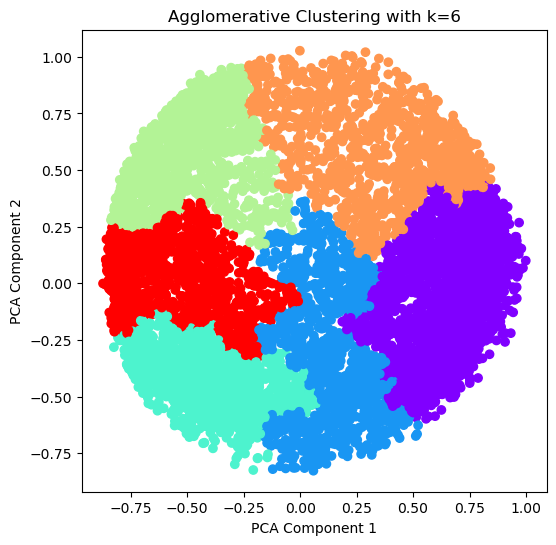

In [153]:
# k=6

ac6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.title('Agglomerative Clustering with k=6')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

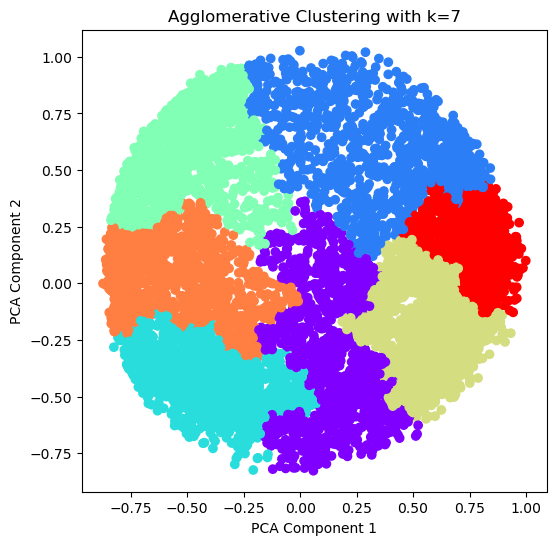

In [155]:
# k=7

ac7 = AgglomerativeClustering(n_clusters = 7)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac7.fit_predict(X_principal), cmap ='rainbow')
plt.title('Agglomerative Clustering with k=7')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [142]:
# Evaluating the different models and Visualizing the results.

k = [2, 3, 4, 5, 6,7]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac7.fit_predict(X_principal)))

## OR

In [ ]:
#from sklearn.metrics import silhouette_score
#from sklearn.cluster import AgglomerativeClustering

# Define the k values
#k_values = [2, 3, 4, 5, 6, 7]

# List to store silhouette scores
#silhouette_scores = []

# Loop through k values, apply AgglomerativeClustering, and compute silhouette score
#for k in k_values:
    #ac = AgglomerativeClustering(n_clusters=k)
    #silhouette_scores.append(silhouette_score(X_principal, ac.fit_predict(X_principal)))

# Print silhouette scores
#print(silhouette_scores)


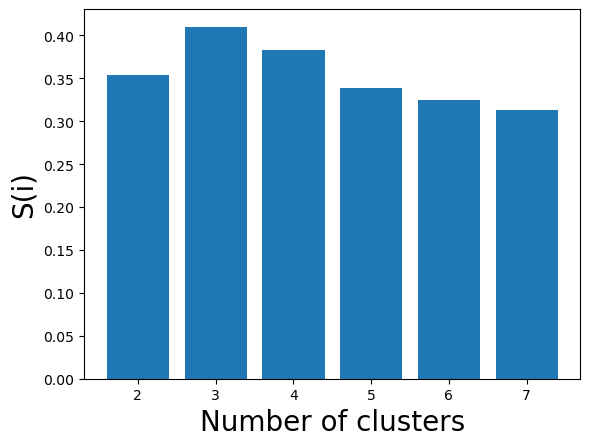

In [144]:
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

## where i am getting highest silhouse score, i will be taking that as optimal number of clusters

## i.e I need to segment my data into 3 clusters

Silhouette Score for Agglomerative Clustering (k=3): 0.4102


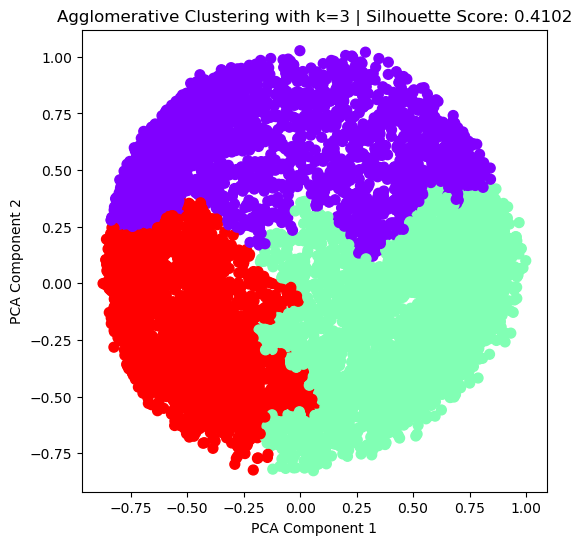

In [163]:
# Agglomerative Clustering for k=3
ac3 = AgglomerativeClustering(n_clusters=3)
labels_ac3 = ac3.fit_predict(X_principal)

# Compute the silhouette score
sil_score_ac3 = silhouette_score(X_principal, labels_ac3)
print(f'Silhouette Score for Agglomerative Clustering (k=3): {sil_score_ac3:.4f}')

# Optional: Visualize the clustering and silhouette score in the plot
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_ac3, cmap='rainbow', s=50)
plt.title(f'Agglomerative Clustering with k=3 | Silhouette Score: {sil_score_ac3:.4f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Single cell Code for silhouette_score measured value

Silhouette Score for Agglomerative Clustering (k=2): 0.3542


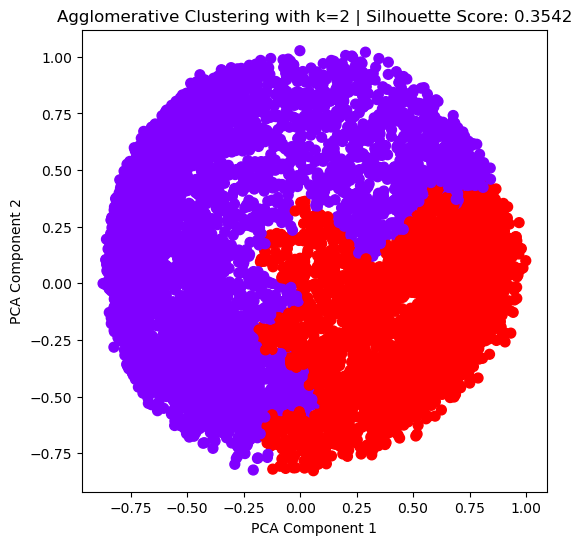

Silhouette Score for Agglomerative Clustering (k=3): 0.4102


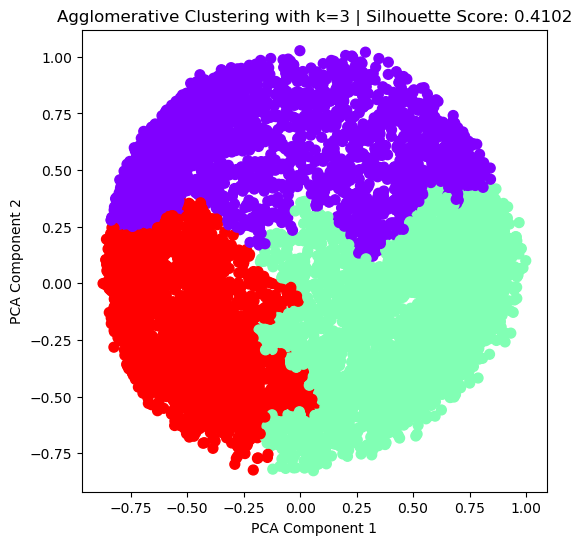

Silhouette Score for Agglomerative Clustering (k=4): 0.3834


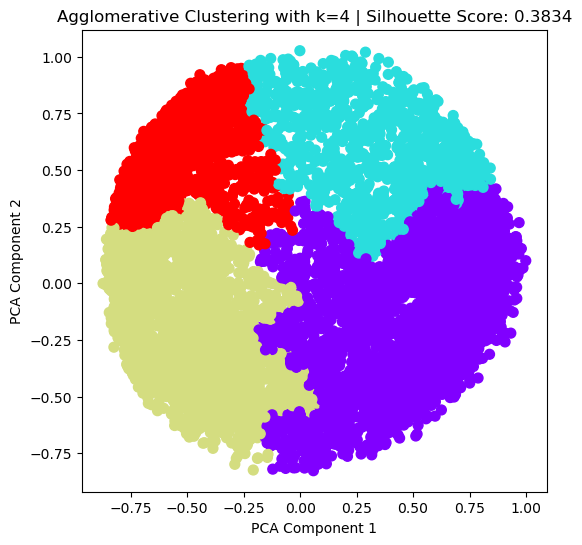

Silhouette Score for Agglomerative Clustering (k=5): 0.3390


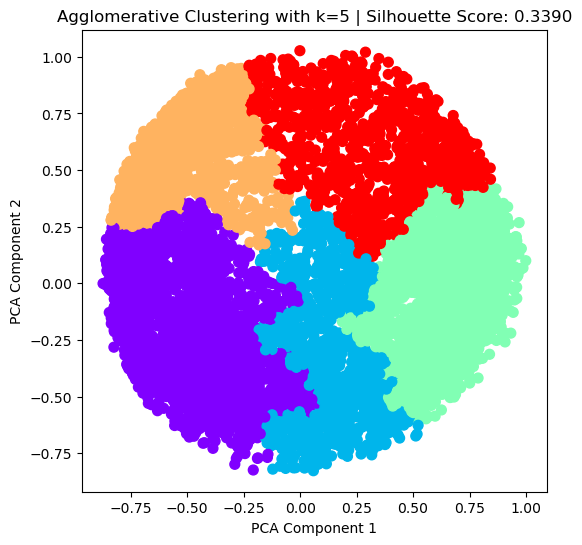

Silhouette Score for Agglomerative Clustering (k=6): 0.3247


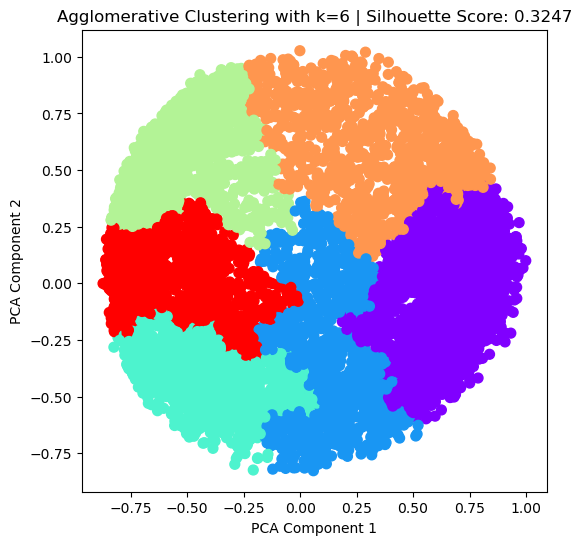

Silhouette Score for Agglomerative Clustering (k=7): 0.3126


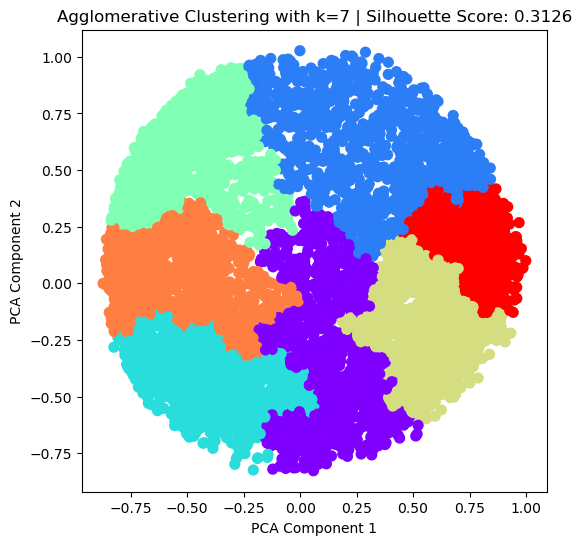

In [165]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Loop through k values from 2 to 7
for k in range(2, 8):
    # Agglomerative Clustering for each k
    ac = AgglomerativeClustering(n_clusters=k)
    labels_ac = ac.fit_predict(X_principal)

    # Compute the silhouette score
    sil_score_ac = silhouette_score(X_principal, labels_ac)
    print(f'Silhouette Score for Agglomerative Clustering (k={k}): {sil_score_ac:.4f}')

    # Visualize the clustering and silhouette score
    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_ac, cmap='rainbow', s=50)
    plt.title(f'Agglomerative Clustering with k={k} | Silhouette Score: {sil_score_ac:.4f}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()